# Introduction to the Finite Element Method with Python
### Bannhat Phat, Robin McDonald, Sophie Howell

### Introduction

The finite element method (FEA/FEM) is a useful numerical method for solving differential equations by subdividing a larger problem into smaller, "finite elements" through the process of discretization. This is achieved by creating a mesh of an object with a finite number of points. A system of equations for each finite element can then be assembled to solve for the entire problem.
FEM is very common in engineering fields, especially for fields such as structural analysis, heat flow, and fluid dynamics. 

FEM is based off of the weak formulation of a differential equation. It can also be easily applied to 1D, 2D, and 3D problems. 

### 1D Problem Walkthrough 

Consider the following 1D two-point boundary value problem with the following boundary conditions.

\begin{equation}
\begin{array}{cccc}
-u''(x) = f(x), &  0 < x < 1 , & u(0) = 0 , & u(1) = 0
\end{array}
\end{equation}

#### Step 1
The first step in the Galerkin FE method is to construct the weak formulation of this equation.
This can be done by multiplying both sides by a test function $v(x)$ that satisfies the following boundary conditions $v(0) = 0$, $v(1) = 0$, such that 

\begin{equation}
-u''v = fv
\end{equation}

This can then be integrated by parts to obtain the following:

\begin{equation}
\int_{0}^{1} u'v'dx = \int_{0}^{1} fvdx
\end{equation}

This is our weak formulation, and we will be coming back to this formula soon.

Note: There is another form of the PDE you can decide to take when using FEM. Using the minimization form when using FEM is called the "Ritz Method." In our case, since we are using the variational/weak form of the PDE with FEM, our method is also known as the "Galerkin method." The weak form is the mostly widely used, although depending on certain assumptions or conditions the original, weak, and minimization forms are identical. 

#### Step 2
The next step is to generate the mesh. This will be a set of coordinates with even spacing. This is essentially the step where you create your finite elements.


For a general example, we can choose $x_i = ih$ where $ i = 0,1,2...n$ and where $ h = 1/n$.
This will define the interval ($x_{i-1}, x_i$) with $i = 1,2...n-1$.

$x_i$ is called a node, and $(x_i,x_{i+1})$, (or ($x_{i-1},x_i$) in our specific case) is called an element.

#### Step 3
The next step is to define a set of basis functions based on the mesh we have just defined.
In our case, we can choose this linear piecewise function. This will end up having a triangle-like shape.

\begin{equation}
   \phi_i(x) = \left\{
\begin{array}{ll}
      \frac{x-x_{i-1}}{h} & x_{i-1} \leq x < x_i, \\
      \frac{x_{i+1}-x}{h} & x_i \leq x < x_{i+1}, \\
      0 & \textrm{otherwise} \\
\end{array} 
\right. 
\end{equation}

This function in particular is called a hat function. General advice for chosing basis functions is to make them as simple as possible. Ideally, it should be zero everywhere outside of a small region, and should be continuous and differentiable except at the nodes.

#### Step 4
We can then represent the approximate finite element solution as a linear combination of all of the basis functions:

\begin{equation}
u_h(x) = \sum_{j=1}^{n-1} c_j\phi_j(x)
\end{equation}

The coefficients are unknown, and they can be determined by deriving a linear system of equations by substituting this approximate solution $u_h(x)$ for the exact solution $u(x)$ in the weak form integral introduced above such that

\begin{equation}
\sum_{j=1}^{n-1} c_j \int_{0}^{1} \phi_j'v'dx = \int_{0}^{1} fvdx
\end{equation}

We can then choose a test function $v(x)$ to be $\phi_1, \phi_2 \cdots \phi_{n-1}$ to get the following system of equations that we can write in matrix form:

\begin{gather}
\begin{bmatrix}
a(\phi_1,\phi_1) & a(\phi_1,\phi_2) & \cdots & a(\phi_1,\phi_{n-1}\\
a(\phi_2,\phi_1) & a(\phi_2,\phi_2) & \cdots & a(\phi_2,\phi_{n-1})\\
\vdots & \vdots & \vdots & \vdots \\
a(\phi_{n-1},\phi_1) & a(\phi_{n-1},\phi_2) & \cdots & a(\phi_{n-1},\phi_{n-1})\\
\end{bmatrix}
\begin{bmatrix}
c_1\\
c_2\\
\vdots\\
c_{n-1}\\
\end{bmatrix}
= \begin{bmatrix}
(f,\phi_1)\\
(f,\phi_2)\\
\vdots \\
(f,\phi_{n-1})\\
\end{bmatrix}
\end{gather}

where 

\begin{equation}
a(\phi_i,\phi_j) = \int_{0}^{1} \phi_i' \phi_j' dx, 
\end{equation}
\begin{equation}
(f,\phi_i) = \int_{0}^{1} f\phi_i dx
\end{equation}

We defined the $\phi_i$ functions already, so our matrix looks like:

\begin{gather}
\begin{bmatrix}
\frac{2}{h} & -\frac{1}{h} &  &  &  &  \\
-\frac{1}{h} & \frac{2}{h} & -\frac{1}{h} &  &  & \\
 & -\frac{1}{h} & \frac{2}{h} & -\frac{1}{h} &  &  \\
 &  & \ddots & \ddots & \ddots & \\
 & & & -\frac{1}{h} & \frac{2}{h} & -\frac{1}{h}\\
 & & & & -\frac{1}{h} & \frac{2}{h}\\
\end{bmatrix}
\begin{bmatrix}
c_1\\
c_2\\
c_3\\
\vdots\\
\vdots\\
c_{n-1}\\
\end{bmatrix}
= \begin{bmatrix}
\int_{0}^{1}f\phi_1dx\\
\int_{0}^{1}f\phi_2dx\\
\int_{0}^{1}f\phi_3dx\\
\vdots\\
\vdots\\
\int_{0}^{1}f\phi_{n-1}dx\\
\end{bmatrix}
\end{gather}

The final step is to simply solve this system of equations for the coefficients. This can be done with Python or Matlab easily since our matrix equation is in Ax = b form.

The coefficient matrix on the far left hand side is called the stiffness matrix. This harks back to early applications of FEM in structural analysis. This matrix represents the coefficients of the vector of unknowns ($c_i$).
The $f_i$ matrix on the right hand side is often referred to as the load vector.

Solving this system of equations will give us the approximate solution for $u_h(x)$ as desired. (Since we are working with sparse matrices, there are several efficient ways to solve such equations such as sparse LU decomposition, we won't be going into the theory of that here today, though). 

### 1D Example with Python

We will attempt to model heat flow within the first 4 km of the Earth's crust. For boundary conditions, let us consider that T = 0 at the very surface, and there is 0 heat flux at the depth of 4 km. Assume that there is radiogenic heating per km 0f 3, which will give us a constant P(x) term. Our governing equation is thus of the form

\begin{equation}
\frac{d^2T}{dz^2} + 3 = 0
\end{equation}

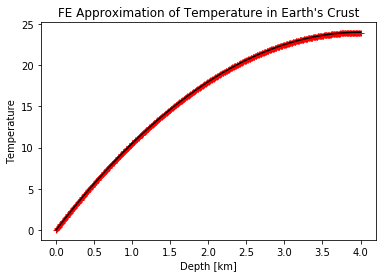

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the problem.

upperBC = 0        # Temperature at the surface of the crust.
lowerBC = 0        # Heat flux is 0 at 4km
Px = 3             # radiogenic heating (p(x) constant term)

# Make a mesh of all of the nodal positions. We can choose what sort of discretization we use here.
# The more nodes we have, the finer the mesh will be, so the closer our approximate solution is to the exact solution. 

#z = np.linspace(0,4,5)   # First option: choose 5 evenly spaced nodes
z = np.linspace(0,4.,500)  # Second option: choose 500 evenly spaced nodes and see how the solutions compare
    
    
# Now we need to define the elements. Remember from our above definition that these are essentially intervals
# representing the distance between two nodes.

h = np.diff(z)             # Vector representing the elements (distances between each node)
h_inv = 1/h               # Will be useful to define 1/h since, looking at our example A matrix, we use that value.


# Now we need to define the coefficient matrix A, or the stiffness matrix. We can follow the form in our math example.
# numpy notation: np.diag(v,k=0) where v is array-like object, and k is an integer set to main diagonal (0) default.

Alower = -np.diag(h_inv,-1)   #lower diagonal 
Aupper = -np.diag(h_inv,1)    #upper diagonal

diag1  = np.append(h_inv,[0]) #constructing the main diagonal
diag2  = np.append([0],h_inv) 
diag   = np.diag(diag1+diag2,0)
A      = diag + Alower + Aupper # add everything to create A

#We need to set the BCs for the A matrix. The first row represents the upper BCs, the final row the lower BCs.

A[0,0] = 1            # upper BC
A[0,1] = 0
A[-1,-1] = 1          # lower BC
A[-1,-2] = -1         

# Now we need to define the load vector / the right hand side of the equation.

f1 = np.append(Px*h/2,[0])    # with a constant Px, 'f' is only integrals over
f2 = np.append([0],Px*h/2)    # single basis functions (over 2 elements)
f = f1+f2

# Set the BCs again.
f[0]  = upperBC               
f[-1] = lowerBC                 

#Now solve.

T = np.linalg.solve(A,f)

#Plot
fig = plt.figure()
p1 = fig.add_subplot(1,1,1)
plt.plot(z,T, 'r-+')  #marks points with red plus mark, '-' connects with lines
p1.set_title("FE Approximation of Temperature in Earth's Crust")
p1.set_ylabel("Temperature")  
p1.set_xlabel("Depth [km]")  

# Compare with analytic solution
z = np.linspace(0,4.,100) 
p1.plot(z,(12*z - 3*z*z/2),'k-') #'k' creates black markers
plt.show()

### 2D Generalization

The above method can be easily generalized to other dimensions by selecting a different mesh and basis functions of some polynomial order. The 2D domain can be discretized easiest using triangles, quadrangles, etc. The process is otherwise identical.